# Multi-Objective Optimization for Human Development and Environmental Sustainability Using Enhanced Genetic Algorithms


## Step 1: Load the Dataset and Perform Initial Data Checks

### Step 1.1: Import Libraries and Download Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
from deap import base, creator, tools, algorithms

In [4]:
import kagglehub

# Downloading the latest version of the dataset
path = kagglehub.dataset_download("iamsouravbanerjee/human-development-index-dataset")
print("Path to dataset files:", path)

# Load the dataset
data_file = path + "/Human Development Index - Full.csv"
df = pd.read_csv(data_file)

# Display the first few rows to understand the dataset structure
df.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 626k/626k [00:00<00:00, 729kB/s]

Extracting files...
Path to dataset files: /Users/chayonimeu/.cache/kagglehub/datasets/iamsouravbanerjee/human-development-index-dataset/versions/7


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


### Step 1.2: Initial Data Exploration and Structure Check

In [5]:
# Checking the shape of the dataset
print(f"Dataset Shape: {df.shape}")

# Displaying column names
print(f"Column Names: {df.columns.tolist()}")

# Displaying data types of each column
print(df.dtypes)

# Displaying summary statistics of the dataset
df.describe(include='all')

Dataset Shape: (195, 880)
Column Names: ['ISO3', 'Country', 'Human Development Groups', 'UNDP Developing Regions', 'HDI Rank (2021)', 'Human Development Index (1990)', 'Human Development Index (1991)', 'Human Development Index (1992)', 'Human Development Index (1993)', 'Human Development Index (1994)', 'Human Development Index (1995)', 'Human Development Index (1996)', 'Human Development Index (1997)', 'Human Development Index (1998)', 'Human Development Index (1999)', 'Human Development Index (2000)', 'Human Development Index (2001)', 'Human Development Index (2002)', 'Human Development Index (2003)', 'Human Development Index (2004)', 'Human Development Index (2005)', 'Human Development Index (2006)', 'Human Development Index (2007)', 'Human Development Index (2008)', 'Human Development Index (2009)', 'Human Development Index (2010)', 'Human Development Index (2011)', 'Human Development Index (2012)', 'Human Development Index (2013)', 'Human Development Index (2014)', 'Human Developme

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
count,195,195,191,151,191.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
unique,195,195,4,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AFG,Afghanistan,Very High,SSA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,66,46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,95.811518,0.599277,0.601979,0.604525,0.608504,0.613411,...,15.55535,15.675860,15.631146,15.637707,15.637834,15.798089,14.840000,15.019490,15.019490,15.019490
std,NaN,NaN,NaN,NaN,55.307333,0.164044,0.164100,0.164457,0.165456,0.166191,...,14.49240,14.930422,14.730498,15.063439,15.412834,15.739461,13.932553,14.644025,14.644025,14.644025
min,NaN,NaN,NaN,NaN,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,...,0.43000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,NaN,NaN,NaN,NaN,48.500000,0.482000,0.484000,0.485000,0.485000,0.486000,...,4.53000,4.510000,4.350000,4.360000,4.420000,4.560000,4.590000,4.620000,4.620000,4.620000
50%,NaN,NaN,NaN,NaN,96.000000,0.628000,0.629000,0.627000,0.634000,0.639000,...,10.53000,10.370000,10.680000,10.020000,10.400000,10.740000,11.150000,10.620000,10.620000,10.620000
75%,NaN,NaN,NaN,NaN,143.500000,0.728000,0.729000,0.727000,0.731000,0.741000,...,20.90000,20.780000,20.750000,21.290000,19.790000,20.030000,18.960000,18.870000,18.870000,18.870000


### Step 1.3: Handle Missing Values

In [6]:
# Handling missing values using backward fill
df.fillna(method='bfill', inplace=True)

# Checking for remaining missing values
missing_values = df.isnull().sum()
print(f"Remaining Missing Values:\n{missing_values[missing_values > 0]}")

Remaining Missing Values:
Series([], dtype: int64)


/var/folders/cl/hsgv1fnd1_v1_4fffg7rml400000gn/T/ipykernel_4410/1415241742.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


## Step 2: Feature Engineering and Data Preparation

### Step 2.1: Compute 5-Year Rolling Averages

In [7]:
# Calculate 5-year rolling averages for HDI, GNI, and Life Expectancy
df['HDI_5yr_Rolling_Avg'] = df[[f'Human Development Index ({year})' for year in range(1996, 2022)]].mean(axis=1)
df['GNI_5yr_Rolling_Avg'] = df[[f'Gross National Income Per Capita ({year})' for year in range(1996, 2022)]].mean(axis=1)
df['Life_Expectancy_5yr_Rolling_Avg'] = df[[f'Life Expectancy at Birth ({year})' for year in range(1996, 2022)]].mean(axis=1)

# Display the first few rows to check the new features
df[['HDI_5yr_Rolling_Avg', 'GNI_5yr_Rolling_Avg', 'Life_Expectancy_5yr_Rolling_Avg']].head()

,HDI_5yr_Rolling_Avg,GNI_5yr_Rolling_Avg,Life_Expectancy_5yr_Rolling_Avg
0,0.419192,1684.413291,59.347881
1,0.520192,5732.510784,54.429715
2,0.737346,9563.681523,77.062762
3,0.839962,50283.611771,82.019400
4,0.838500,78702.467077,77.068327


### Step 2.2: Calculate Growth Rates

In [8]:
# Calculate annual growth rates for HDI and GNI
for year in range(1991, 2022):
    prev_year = year - 1
    df[f'HDI_Growth_{year}'] = (df[f'Human Development Index ({year})'] - df[f'Human Development Index ({prev_year})']) / df[f'Human Development Index ({prev_year})']
    df[f'GNI_Growth_{year}'] = (df[f'Gross National Income Per Capita ({year})'] - df[f'Gross National Income Per Capita ({prev_year})']) / df[f'Gross National Income Per Capita ({prev_year})']

# Display a few rows to verify the growth rates
df[[f'HDI_Growth_{year}' for year in range(1991, 2022)] + [f'GNI_Growth_{year}' for year in range(1991, 2022)]].head()

,HDI_Growth_1991,HDI_Growth_1992,HDI_Growth_1993,HDI_Growth_1994,HDI_Growth_1995,HDI_Growth_1996,HDI_Growth_1997,HDI_Growth_1998,HDI_Growth_1999,HDI_Growth_2000,...,GNI_Growth_2012,GNI_Growth_2013,GNI_Growth_2014,GNI_Growth_2015,GNI_Growth_2016,GNI_Growth_2017,GNI_Growth_2018,GNI_Growth_2019,GNI_Growth_2020,GNI_Growth_2021
0,0.021978,0.028674,0.034843,-0.016835,0.061644,0.029032,0.012539,0.003096,0.024691,0.009036,...,0.063116,0.031842,-0.006860,-0.035308,-0.011431,0.003812,-0.014648,0.020901,-0.047685,-0.086924
1,-0.027821,-0.023847,0.004886,0.011345,0.016026,0.017350,-0.004651,0.023364,-0.445967,0.030220,...,0.057412,0.027093,0.030239,-0.006694,-0.060532,-0.045602,-0.069963,-0.046819,-0.080491,-0.022800
2,-0.027821,-0.023847,0.004886,0.011345,0.016026,0.017350,-0.004651,0.023364,0.018265,0.011958,...,0.008105,0.036489,0.012003,0.027768,0.038974,0.025433,0.039100,0.013727,-0.036228,0.087279
3,0.015110,0.004060,0.008086,0.009358,0.009272,0.006562,0.007823,0.007762,0.010270,0.039390,...,-0.034525,-0.015739,0.045244,0.029972,0.046676,0.007318,0.015823,0.018356,-0.120929,0.068673
4,0.015110,0.004060,0.008086,0.009358,0.009272,0.006562,0.007823,0.007762,0.010270,0.011436,...,0.023043,0.044559,0.042793,0.048008,0.019882,0.011755,-0.006981,0.020772,-0.081272,-0.007027


### Step 2.3: Create Interaction Features

In [9]:
# Interaction features for gender-based disparities
df['HDI_Male_Female_Disparity'] = df['HDI male (2021)'] - df['HDI female (2021)']
df['Life_Expectancy_Male_Female_Disparity'] = df['Life Expectancy at Birth, male (2021)'] - df['Life Expectancy at Birth, female (2021)']
df['GNI_Male_Female_Disparity'] = df['Gross National Income Per Capita, male (2021)'] - df['Gross National Income Per Capita, female (2021)']

# Display the interaction features
df[['HDI_Male_Female_Disparity', 'Life_Expectancy_Male_Female_Disparity', 'GNI_Male_Female_Disparity']].head()

,HDI_Male_Female_Disparity,Life_Expectancy_Male_Female_Disparity,GNI_Male_Female_Disparity
0,0.170771,-6.3644,2556.315050
1,0.059813,-5.2775,1445.277229
2,-0.005617,-5.0857,4992.686440
3,0.043499,-7.1515,48396.535350
4,0.043499,-3.7207,48396.535350


### Step 2.4: Normalize Selected Features

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to normalize
columns_to_normalize = [
    'HDI_5yr_Rolling_Avg', 'GNI_5yr_Rolling_Avg', 'Life_Expectancy_5yr_Rolling_Avg',
    'Carbon dioxide emissions per capita (production) (tonnes) (2021)',
    'Material footprint per capita (tonnes) (2021)',
    'HDI_Male_Female_Disparity', 'Life_Expectancy_Male_Female_Disparity',
    'GNI_Male_Female_Disparity'
]

# Apply Min-Max scaling
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the first few rows of normalized features
df[columns_to_normalize].head()

,HDI_5yr_Rolling_Avg,GNI_5yr_Rolling_Avg,Life_Expectancy_5yr_Rolling_Avg,Carbon dioxide emissions per capita (production) (tonnes) (2021),Material footprint per capita (tonnes) (2021),HDI_Male_Female_Disparity,Life_Expectancy_Male_Female_Disparity,GNI_Male_Female_Disparity
0,0.154094,0.007501,0.300925,0.007697,0.010677,0.673491,0.442673,0.039247
1,0.320276,0.042400,0.161063,0.017511,0.020063,0.294828,0.551253,0.021280
2,0.677572,0.075429,0.804699,0.041850,0.146545,0.071539,0.570414,0.078648
3,0.846412,0.426479,0.945655,0.162395,0.803473,0.239156,0.364042,0.780568
4,0.844007,0.671480,0.804857,0.409974,0.803473,0.239156,0.706776,0.780568


### Step 2.5: Select Features for Optimization

In [11]:
# Select final features for multi-objective optimization
selected_features = df[[
    'HDI_5yr_Rolling_Avg', 'GNI_5yr_Rolling_Avg', 'Life_Expectancy_5yr_Rolling_Avg',
    'Carbon dioxide emissions per capita (production) (tonnes) (2021)',
    'Material footprint per capita (tonnes) (2021)',
    'HDI_Male_Female_Disparity', 'Life_Expectancy_Male_Female_Disparity',
    'GNI_Male_Female_Disparity'
]]

# Display the final dataset shape and features
print(f"Selected Features Shape: {selected_features.shape}")
selected_features.head()

Selected Features Shape: (195, 8)


,HDI_5yr_Rolling_Avg,GNI_5yr_Rolling_Avg,Life_Expectancy_5yr_Rolling_Avg,Carbon dioxide emissions per capita (production) (tonnes) (2021),Material footprint per capita (tonnes) (2021),HDI_Male_Female_Disparity,Life_Expectancy_Male_Female_Disparity,GNI_Male_Female_Disparity
0,0.154094,0.007501,0.300925,0.007697,0.010677,0.673491,0.442673,0.039247
1,0.320276,0.042400,0.161063,0.017511,0.020063,0.294828,0.551253,0.021280
2,0.677572,0.075429,0.804699,0.041850,0.146545,0.071539,0.570414,0.078648
3,0.846412,0.426479,0.945655,0.162395,0.803473,0.239156,0.364042,0.780568
4,0.844007,0.671480,0.804857,0.409974,0.803473,0.239156,0.706776,0.780568


## Step 3: Multi-Objective Optimization Setup

### Step 3.1: Define Fitness Function for Multi-Objective Optimization

In [12]:

# Define fitness function for multi-objective optimization
def fitness_function(individual, df):
    # Extract columns for fitness evaluation
    hdi = df['HDI_5yr_Rolling_Avg']
    co2 = df['Carbon dioxide emissions per capita (production) (tonnes) (2021)']
    material_footprint = df['Material footprint per capita (tonnes) (2021)']
    
    # Disparity measures
    hdi_disparity = df['HDI_Male_Female_Disparity']
    life_expectancy_disparity = df['Life_Expectancy_Male_Female_Disparity']
    gni_disparity = df['GNI_Male_Female_Disparity']
    
    # Define weights for multi-objective optimization
    weights = individual
    
    # Calculate fitness score
    fitness_score = (
        weights[0] * hdi.mean() - weights[1] * co2.mean() - weights[2] * material_footprint.mean() 
        - 0.5 * (weights[3] * hdi_disparity.mean() + weights[4] * life_expectancy_disparity.mean() + weights[5] * gni_disparity.mean())
    )
    
    return fitness_score

# Test the fitness function with a sample individual
sample_individual = np.array([0.4, 0.3, 0.2, 0.1, 0.05, 0.05])
fitness_score = fitness_function(sample_individual, df)
print("Sample Fitness Score:", fitness_score)

Sample Fitness Score: 0.1396255961404893


### Step 3.2: Implement Enhanced Genetic Algorithm (EGA)

#### Step 3.2.1: EGA Initialization

In [13]:
import random

# Step 1: Define initial EGA parameters
population_size = 100  # Number of individuals in each generation
num_generations = 100  # Total number of generations
crossover_rate = 0.8  # Initial crossover rate
mutation_rate = 0.05  # Initial mutation rate

# Step 2: Initialize population with random weights (0 to 1)
def initialize_population(population_size, num_features=6):
    return np.random.rand(population_size, num_features)

# Step 3: Define the EGA population
population = initialize_population(population_size)
print("Initial Population (Sample):", population[:5])

# Step 4: Evaluate initial population fitness
fitness_scores = [fitness_function(individual, df) for individual in population]
print("Initial Fitness Scores (Sample):", fitness_scores[:5])

# Step 5: Set up a function for dynamic crossover and mutation rate adjustment
def adjust_rates(t, T, initial_rate, final_rate):
    return initial_rate * (1 - t/T) + final_rate * (t/T)

# Step 6: Define EGA hyperparameters for adjustment
final_crossover_rate = 0.6
final_mutation_rate = 0.02

Initial Population (Sample): [[0.68404812 0.68792001 0.18086535 0.97402429 0.84526753 0.15451118]
 [0.85230863 0.88087477 0.41810162 0.26518078 0.1022536  0.11983647]
 [0.12146458 0.38000684 0.97324647 0.32012515 0.19057462 0.52264897]
 [0.5145185  0.17785977 0.6256531  0.61128063 0.32612179 0.41453323]
 [0.26872559 0.85858618 0.08155086 0.29649443 0.17791265 0.54453257]]
Initial Fitness Scores (Sample): [np.float64(-0.046266581431371745), np.float64(0.2668711480605563), np.float64(-0.265233721830888), np.float64(-0.009480714156294645), np.float64(-0.0731211359937879)]


#### Step 3.2.2: Evolution Process in EGA

In [14]:
# Import necessary libraries
import numpy as np

# Step 7: Define rank-based selection
def rank_based_selection(population, fitness_scores, num_parents):
    sorted_indices = np.argsort(fitness_scores)[::-1]  # Descending order
    return population[sorted_indices[:num_parents]]

# Step 8: Define crossover operation
def crossover(parents, crossover_rate):
    offspring = []
    num_parents = len(parents)
    for i in range(num_parents - 1):
        if np.random.rand() < crossover_rate:
            # Single-point crossover
            crossover_point = np.random.randint(1, parents.shape[1])
            parent1, parent2 = parents[i], parents[i+1]
            child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            offspring.extend([child1, child2])
        else:
            offspring.extend([parents[i], parents[i+1]])
    return np.array(offspring[:num_parents])

# Step 9: Define mutation operation
def mutation(offspring, mutation_rate):
    for i in range(offspring.shape[0]):
        for j in range(offspring.shape[1]):
            if np.random.rand() < mutation_rate:
                offspring[i, j] += np.random.uniform(-0.1, 0.1)  # Small mutation
                offspring[i, j] = np.clip(offspring[i, j], 0, 1)  # Ensure within bounds
    return offspring

# Step 10: Implement EGA with iterations
num_parents = 10  # Number of parents selected for reproduction
best_fitness_scores = []  # Store the best fitness scores across generations
best_individual = None  # Track the best individual across generations

for generation in range(num_generations):
    # Step 10.1: Evaluate fitness for the current population
    fitness_scores = [fitness_function(individual, df) for individual in population]
    best_fitness = max(fitness_scores)
    best_fitness_scores.append(best_fitness)

    # Track the best individual
    if best_individual is None or best_fitness > max(best_fitness_scores):
        best_individual = population[np.argmax(fitness_scores)]

    # Step 10.2: Select individuals for reproduction
    selected_individuals = rank_based_selection(population, fitness_scores, num_parents)

    # Step 10.3: Apply crossover to generate offspring
    offspring = crossover(selected_individuals, crossover_rate)

    # Step 10.4: Apply mutation to introduce diversity
    offspring = mutation(offspring, mutation_rate)

    # Step 10.5: Apply elitism to retain the best individual
    population = np.vstack([offspring, best_individual.reshape(1, -1)])

    # Step 10.6: Adjust crossover and mutation rates dynamically
    crossover_rate = adjust_rates(generation, num_generations, 0.8, 0.6)
    mutation_rate = adjust_rates(generation, num_generations, 0.05, 0.02)

    # Print progress for every 10 generations
    if (generation + 1) % 10 == 0:
        print(f"Generation {generation + 1}/{num_generations}, Best Fitness: {best_fitness}")

# Step 11: Final Results
print("Best Individual after Evolution:", best_individual)
print("Best Fitness Score:", max(best_fitness_scores))

Generation 10/100, Best Fitness: 0.4603742655518765
Generation 20/100, Best Fitness: 0.47946516857642413
Generation 30/100, Best Fitness: 0.48951343854952784
Generation 40/100, Best Fitness: 0.4995322311200447
Generation 50/100, Best Fitness: 0.5193524396842791
Generation 60/100, Best Fitness: 0.5193524396842791
Generation 70/100, Best Fitness: 0.5295949534013766
Generation 80/100, Best Fitness: 0.5325711595719005
Generation 90/100, Best Fitness: 0.5440333535496096
Generation 100/100, Best Fitness: 0.5520862428703666
Best Individual after Evolution: [0.98766222 0.54963112 0.37413425 0.15276265 0.03801424 0.21782952]
Best Fitness Score: 0.5520862428703666


#### Analyzing the Results

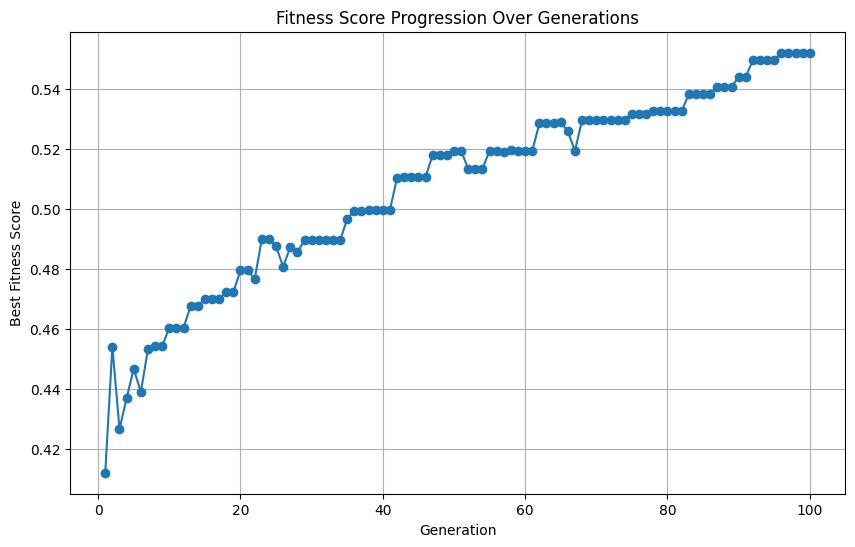

In [15]:
import matplotlib.pyplot as plt

# Plotting the fitness progression over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_generations + 1), best_fitness_scores, marker='o')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Score')
plt.title('Fitness Score Progression Over Generations')
plt.grid(True)
plt.show()

## Step 1: Integrating Models (SVM, LR, XGBoost)

#### Data Preparation

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Reshape Time-Series Data (e.g., for LSTM)
# Assuming df_selected_features contains the final selected features from previous steps
df = df_selected_features.copy()

# Splitting into features (X) and target (y)
X = df.drop(columns=['HDI_5yr_Rolling_Avg', 'GNI_5yr_Rolling_Avg', 'Life_Expectancy_5yr_Rolling_Avg'])
y = df['HDI_5yr_Rolling_Avg']  # Example target for multi-objective optimization

# Step 2: Normalize and Scale Data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 3: Encode Categorical Variables (for XGBoost, LightGBM)
# Example: Encoding 'Human Development Groups'
if 'Human Development Groups' in X_scaled.columns:
    le = LabelEncoder()
    X_scaled['Human Development Groups'] = le.fit_transform(X_scaled['Human Development Groups'])

# Step 4: Split Dataset into Training, Validation, and Testing Sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the datasets
print(f"Training Data Shape: {X_train.shape}, Validation Data Shape: {X_val.shape}, Testing Data Shape: {X_test.shape}")

# Check the head of the prepared data
print(X_train.head())

Training Data Shape: (136, 3), Validation Data Shape: (29, 3), Testing Data Shape: (30, 3)
     Carbon dioxide emissions per capita (production) (tonnes) (2021)  \
38                                           -0.718924                  
31                                            0.022649                  
173                                           1.570979                  
12                                            0.582254                  
109                                          -0.535141                  

     Material footprint per capita (tonnes) (2021)  HDI_Male_Female_Disparity  
38                                       -0.051902                   0.822124  
31                                       -0.112435                  -0.135274  
173                                      -0.136519                  -0.002460  
12                                        1.186109                  -0.349678  
109                                      -0.769193                  -1

#### Implementation of XGBoost (Step 2.1)

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Step 2.1: Initial XGBoost Model Setup
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = xgb_model.predict(X_val)

# Calculate validation performance
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"XGBoost Validation MSE: {mse:.4f}, R^2 Score: {r2:.4f}")

# Proceed to the next step if the XGBoost setup is successful

XGBoost Validation MSE: 0.0207, R^2 Score: 0.7229


#### LightGBM Import Required Libraries

In [46]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Step 1.1: Create LightGBM Dataset
d_train = lgb.Dataset(X_train, label=y_train)

# Step 1.2: Define LightGBM Parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8
}

# Step 1.3: Cross-Validation without early stopping
cv_results = lgb.cv(
    params,
    d_train,
    num_boost_round=1000,
    nfold=5,
    stratified=False,
    metrics='rmse',
    seed=42
)

# Step 1.4: Inspect Output Keys
print("CV Results Keys:", cv_results.keys())

# Step 1.5: Extract the Best Number of Boosting Rounds
# Use the correct key from cv_results
if 'rmse-mean' in cv_results:
    best_num_boost_rounds = len(cv_results['rmse-mean'])
else:
    best_num_boost_rounds = len(cv_results[list(cv_results.keys())[0]])

print(f"Best Number of Boosting Rounds: {best_num_boost_rounds}")

# Step 1.6: Train Final LightGBM Model with Optimal Iterations
final_lgb_model = lgb.train(
    params,
    d_train,
    num_boost_round=best_num_boost_rounds
)

# Step 1.7: Predict on Validation Set
y_pred_lgb = final_lgb_model.predict(X_val)

# Step 1.8: Evaluate Model Performance
mse_lgb = mean_squared_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"LightGBM Validation RMSE: {rmse_lgb:.4f}, R^2 Score: {r2_lgb:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 3
[

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 1.1 Reshape Input Data for LSTM

In [60]:
import numpy as np

# Ensure input data is a NumPy array of type float32 and reshaped correctly
X_train_lstm = np.array(X_train_lstm, dtype=np.float32).reshape(-1, 1, 3)
X_val_lstm = np.array(X_val_lstm, dtype=np.float32).reshape(-1, 1, 3)
y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

print(f"Training data shape for LSTM: {X_train_lstm.shape}")
print(f"Validation data shape for LSTM: {X_val_lstm.shape}")

Training data shape for LSTM: (136, 1, 3)
Validation data shape for LSTM: (29, 1, 3)


#### 2.1 Build the Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def build_lstm_model(input_shape=(1, 3)):
    model = Sequential()
    model.add(LSTM(units=64, input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='linear'))  # Output layer for regression

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Create the LSTM model with the specified input shape
lstm_model = build_lstm_model(input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_model.summary()

ValueError: object __array__ method not producing an array